#### Objective :
You are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem. 

### Importing Libraries and data set

In [167]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib
%matplotlib inline
# Matlab-style plotting
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# Model Building libraries
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [168]:
# Import Data
train_data  = pd.read_csv('train.csv')
test_data  = pd.read_csv('test.csv')

### Let's understand the structure of our dataframe and Clean it

In [169]:
# descriptive statistics
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [170]:
# descriptive statistics for test data
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [171]:
train_data.shape # print the dimension or shape of train data

(42000, 785)

In [172]:
test_data.shape # print the dimension or shape of test data

(28000, 784)

In [173]:
train_data.head() # printing first five columns of train_data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
test_data.head() # printing first five columns of test_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
# Check if there are no missing values in the dataset and NA values in dataset
print("For Train Data - ")
print(train_data.isnull().values.any())
print(train_data.isnull().values.sum())
print(train_data.isnull().all(axis=1).sum())
print("For Test Data - ")
print(test_data.isnull().values.any())
print(test_data.isnull().values.sum())
print(test_data.isnull().all(axis=1).sum())

For Train Data - 
False
0
0
For Test Data - 
False
0
0


In [176]:
train_data.shape
#test_data.isnull().sum().head(10)

(42000, 785)

In [177]:
# Characteristics about the test dataset.

print("Summarized Dimensions test_data: ",test_data.shape, "\n")

# Check data types
print(test_data.info())

# Check head
test_data.head()

Summarized Dimensions test_data:  (28000, 784) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
# Since the training dataset is quite large (42,000 labelled images), it would take a lot of time for training an SVM 
# on the full MNIST data, so you can sub-sample the data for training (10-20% of the data should be enough to achieve
# decent accuracy)
# Considering 30%
train_data_min = train_data.sample(frac=0.3, random_state=1)

# Check dimensions
print("Summarized Dimensions train_data : ",train_data_min.shape, "\n")

# data types
print(train_data_min.info())

# head
train_data_min.head()

Summarized Dimensions train_data :  (12600, 785) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12600 entries, 29633 to 36833
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 75.6 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29633,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
345,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36369,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16624,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14389,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
order = list(np.sort(train_data_min['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#### Visualizing the number of class and counts in the datasets

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

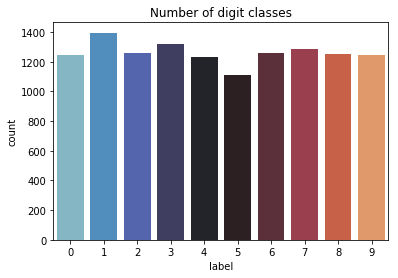

In [180]:
plt.plot(figure = (15,10))
g = sns.countplot( train_data_min["label"], palette = 'icefire')
plt.title('Number of digit classes')
train_data.label.astype('category').value_counts()

Text(0.5,1,'Digit 8')

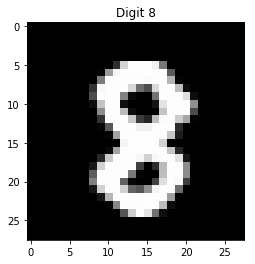

In [181]:
# Plotting some samples and converting into matrix
eight = train_data_min.iloc[3, 1:]
eight.shape
eight = eight.values.reshape(28,28)
plt.imshow(eight, cmap='gray')
plt.title("Digit 8")


### Data Preparation

Let's us start some data preparation steps before getting into modeling. Firstly, let's see if it is important and necessary to rescale the features, since they might have varying ranges.

In [182]:
# calculate the average feature values
round(train_data_min.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.00
pixel14     0.00
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.00
pixel762    0.02
pixel763    0.09
pixel764    0.14
pixel765    0.17
pixel766    0.29
pixel767    0.42
pixel768    0.47
pixel769    0.46
pixel770    0.60
pixel771    0.44
pixel772    0.32
pixel773    0.26
pixel774    0.19
pixel775    0.16
pixel776    0.09
pixel777    0.03
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

In this case, the average values do not vary a lot (e.g. having a diff of an order of magnitude). But it is a good practise to rescale them.

In [183]:
## the X and Y variable

y = train_data_min['label']

## Dropping the variable 'label' from X variable 
X = train_data_min.drop(columns = 'label')

## the size of data 
print(train_data_min.shape)

(12600, 785)


In [184]:
## Performing Normalization
## Normalized RGB- If you divide by 255 the range can be described with a 0.0-1.0 
X = X/255.0
test_data = test_data/255.0

print("X:", X.shape)
print("test_data:", test_data.shape)

X: (12600, 784)
test_data: (28000, 784)


In [185]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
# Performing Scaling of features
X = scale(X)

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, train_size = 0.7 ,random_state = 10)

### Model Building

Let's first try building two models - linear and non-linear with default hyperparameters, and we can compare the accuracies.

In [187]:
# 1. Linear Model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [188]:
# Calculate accuracy
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")
# Calculate confusion matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy: 0.9148148148148149 

[[404   0   1   0   0   1   1   0   2   1]
 [  0 416   0   2   0   1   0   0   2   0]
 [  4   0 347   8   3   3   4   1   7   1]
 [  3   6  12 335   0  20   1   3   8   2]
 [  2   1   5   0 337   0   0   0   1  19]
 [  2   0   3  20   2 285   2   0  10   2]
 [  3   1   5   0   2   5 339   1   1   0]
 [  2   2   3   3   6   0   0 368   0   9]
 [  4   7   7  16   5  13   4   1 305   4]
 [  6   2   3   3  12   3   1  22   0 322]]


The linear model gives ~ 91% accuracy. Let's now perform a non-linear model with randomly chosen hyperparameters.

In [189]:
# NoN-linear model with rbf kernel, C=1, default value of gamma

# Performing SVC to get model
non_linear_model = SVC(kernel='rbf')

# Fitting train dat 
non_linear_model.fit(X_train, y_train)

# Evaluate prediction
y_pred = non_linear_model.predict(X_test)

In [190]:
# Calculate confusion matrix and accuracy
# Accuracy
print("Accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# Confusion Matrix
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Accuracy: 0.9441798941798942 

[[400   0   4   0   0   0   3   0   3   0]
 [  0 414   2   1   0   1   1   0   2   0]
 [  0   0 361   4   5   0   2   2   4   0]
 [  0   5  11 357   0   8   0   2   6   1]
 [  2   2   7   0 344   0   0   0   1   9]
 [  1   0   3   5   2 307   3   0   3   2]
 [  1   1   3   0   3   2 346   1   0   0]
 [  0   2  12   2   3   0   0 367   0   7]
 [  2   5   0   7   4  13   1   0 332   2]
 [  4   0   5   4   8   1   1  10   0 341]]


This is Good as Non Linaer model gives ~ 94% accuracy. Thus, we would choose non linear model going forward, and choose hyperparameters corresponding to non-linear models.

### Grid Search and Hyperparameter Tuning

Let's now fine tune the model and find the optimal values of C and gamma corresponding to RBF kernel.

In [191]:
## Also, running a GridSearchCV() may take hours 
## if you use a large value of k (fold-CV) such as 10 and a wide range of hyperparameters; k = 5 should be sufficient. 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# Specify range of hyperparameters and Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],'C': [5,10]}]

# Specify the model
model = SVC(kernel="rbf")

# Set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 37.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [192]:
# Cross Validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,84.320158,1.199912,10.390164,0.412601,5,0.01,"{'C': 5, 'gamma': 0.01}",0.755102,0.760204,0.781746,...,0.765306,0.011039,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,17.235795,0.510880,5.292737,0.069360,5,0.001,"{'C': 5, 'gamma': 0.001}",0.932540,0.947279,0.946145,...,0.941610,0.005635,1,0.996599,0.997024,0.996882,0.997591,0.996457,0.996910,0.000395
2,16.074644,0.238393,5.820202,0.225080,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.918367,0.927438,0.931973,...,0.927098,0.005166,4,0.949546,0.949546,0.949546,0.948696,0.949688,0.949405,0.000359
3,86.133930,2.123967,10.522532,0.246888,10,0.01,"{'C': 10, 'gamma': 0.01}",0.755102,0.760204,0.781746,...,0.765306,0.011039,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,17.658717,0.369235,5.631509,0.227212,10,0.001,"{'C': 10, 'gamma': 0.001}",0.931973,0.945578,0.942177,...,0.940703,0.004751,2,0.999150,0.999433,0.999008,0.999150,0.999008,0.999150,0.000155
5,13.455523,0.276952,5.114813,0.174585,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.926871,0.931406,0.934240,...,0.930952,0.003852,3,0.962160,0.960884,0.959751,0.959892,0.961451,0.960828,0.000917


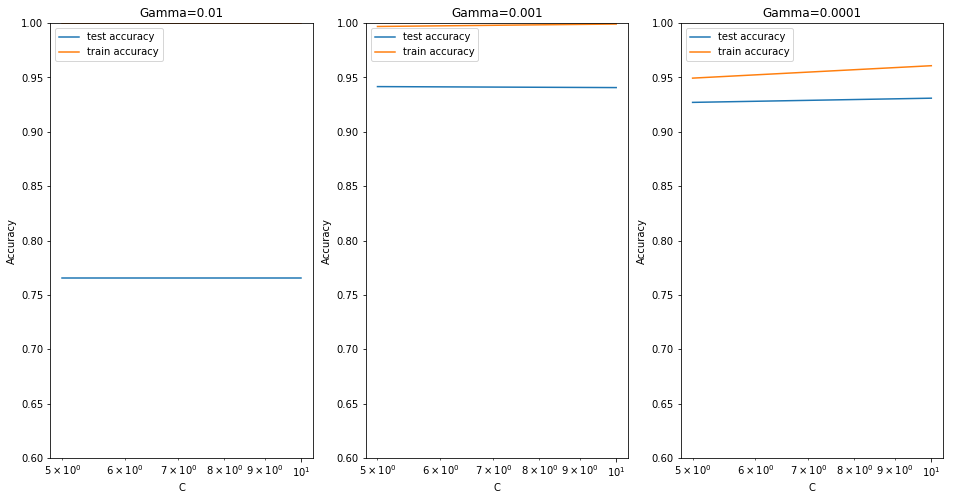

In [193]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

## Plotting
plt.figure(figsize=(16,8))

# subplot 1/3 for Gamma 0.01
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3 for Gamma 0.001
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3 for Gamma 0.0001
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

Lets take some observation from above plot as From higher to lower gamma i.e left to right):

1. At very high gamma (i.e 0.01), the model is looking like achieving 100% accuracy on the training data, though the test score is quite low (<80%). Thus, this model is overfitting.

2. Now At gamma=0.001, the training and test scores are comparable at around C=1, though the model starts to overfit at higher values of C.

3. With gamma=0.0001, the model does not overfit till C=10 but starts showing signs at C=100. Also, the training and test scores are slightly lower than at gamma=0.001.

Thus, from the above points it seems that the good combination is gamma=0.001 and C=15 (the plot in the middle), which gives the highest test accuracy (~94%) while avoiding overfitting.

We can proceed now to build the final model and see its performance on test data.

**Let's now choose the best hyperparameters for the model.**

In [194]:
# Calculate optimal accuracy score and hyperparameters
best_hyperparams = model_cv.best_params_
best_score = model_cv.best_score_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.941609977324263 corresponding to hyperparameters {'C': 5, 'gamma': 0.001}


### Build & Evaluate- Final Model

Let's now build and evaluate the model with highest test accuracy.

In [195]:
# Model with optimal hyperparameters
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9563492063492064 

[[402   0   4   0   0   0   2   0   2   0]
 [  0 417   2   0   0   1   0   0   1   0]
 [  0   0 363   6   3   1   2   1   2   0]
 [  0   3   8 365   0   7   0   1   5   1]
 [  2   1   5   0 346   0   0   0   1  10]
 [  0   0   2   3   2 313   3   0   2   1]
 [  1   1   3   0   2   2 346   1   1   0]
 [  0   1  12   2   4   0   0 371   0   3]
 [  1   3   0   3   5   8   2   0 342   2]
 [  4   0   6   1   5   1   1   6   0 350]] 



In [196]:
## Lets Predict with the test data
Predicted_Value=model.predict(test_data)

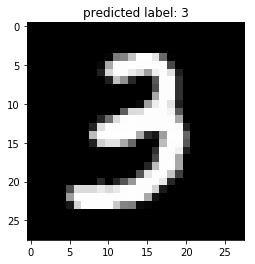

In [225]:
## Checking predicted value with test_data for arbitary index i

i = 7
two_d = (np.reshape(test_data.values[i], (28, 28)) * 255).astype(np.uint8)
plt.title('predicted label: {0}'. format(Predicted_Value[i]))
plt.imshow(two_d, interpolation='nearest', cmap='gray')
plt.show()

**Conclusion**

The accuracy achieved using a non-linear kernel (~0.95) is much higher than that of a linear one (~0.91). We can conclude that the problem is highly non-linear in nature.